In [1]:
%run Pre-process.ipynb

Autosaving every 120 seconds


In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import statistics
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
usecols = ['id', 'target', 'comment_text']
train = pd.read_csv('data/train.csv', usecols=usecols, dtype = {'id': int})

In [4]:
train.set_index(train['id'], inplace=True)
train = train.drop('id', axis=1).copy()

In [5]:
train.head()

,target,comment_text
id,,
59848,0.000000,"This is so cool. It's like, 'would you want yo..."
59849,0.000000,Thank you!! This would make my life a lot less...
59852,0.000000,This is such an urgent design problem; kudos t...
59855,0.000000,Is this something I'll be able to install on m...
59856,0.893617,haha you guys are a bunch of losers.


In [6]:
#X_train = train.iloc[:2000,].comment_text
X_train = train.comment_text

#y_train = train.iloc[:2000,].target
y_train = train.target
y_train_encoded = y_train.apply(lambda x: 1 if x >= 0.5 else 0)

In [7]:
# comments before preprocessing
for i in range(10):
    print(X_train.iloc[i])

This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!
Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!
This is such an urgent design problem; kudos to you for taking it on. Very impressive!
Is this something I'll be able to install on my site? When will you be releasing it?
haha you guys are a bunch of losers.
ur a sh*tty comment.
hahahahahahahahhha suck it.
FFFFUUUUUUUUUUUUUUU
The ranchers seem motivated by mostly by greed; no one should have the right to allow their animals destroy public land.
It was a great show. Not a combo I'd of expected to be good together but it was.


In [8]:
# comments after preprocessing with stopwords kept
X_train_tidy = preprocess(X_train)
for i in range(10):
    print(X_train_tidy.iloc[i])

this be so cool -PRON- be like ' would -PRON- want -PRON- mother to read this ' really great idea well do
thank -PRON- this would make -PRON- life a lot less anxiety induce keep -PRON- up and do n't let anyone get in -PRON- way
this be such an urgent design problem kudo to -PRON- for take -PRON- on very impressive
be this something i will be able to install on -PRON- site when will -PRON- be release -PRON-
haha -PRON- guy be a bunch of loser
ur a sh tty comment
hahahahahahahahhha suck -PRON-
ffffuuuuuuuuuuuuuuu
the rancher seem motivate by mostly by greed no one should have the right to allow -PRON- animal destroy public land
-PRON- be a great show not a combo i have of expect to be good together but -PRON- be


In [14]:
X_train_tidy = pd.DataFrame({'comment_text':X_train_tidy})
allindices = X_train_tidy.index
print('before removing dup:', X_train_tidy.shape)

X_train_tidy.drop_duplicates(subset='comment_text', keep='first', inplace=True)
print('after removing dup:', X_train_tidy.shape)

removedId = set(allindices)- set(X_train_tidy.index) # instances removed
y_train_encoded = y_train_encoded.iloc[~y_train_encoded.index.isin(removedId)]

before removing dup: (1764928, 1)
after removing dup: (1764928, 1)


In [15]:
X_train_tidy = pd.Series(X_train_tidy.comment_text)

In [16]:
# counter of number of words (tokens) in each comment
len_comments =  [len(x.split()) for x in X_train_tidy]
count_len_comments = Counter(len_comments) 

print('Number of 0-length comments:', count_len_comments[0])
print("Comments' maximum length:", max(count_len_comments))
print("Number of longest comments:", count_len_comments[max(count_len_comments)])

Number of 0-length comments: 1
Comments' maximum length: 538
Number of longest comments: 1


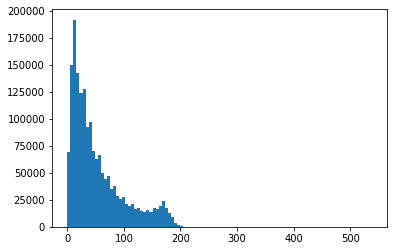

In [17]:
import matplotlib.pyplot as plt
plt.hist(len_comments, bins=100)
plt.show()

In [20]:
# remove outliers - short comments
non_zero_len = X_train_tidy.apply(lambda x: len(x.split()) != 0) # a series of booleans
X_train_remove0len = X_train_tidy[non_zero_len].copy()
non_zero_len_indices = X_train_remove0len.index
y_train_remove0len = y_train_encoded.loc[non_zero_len_indices].copy()

print(X_train_remove0len.shape)
print(y_train_remove0len.shape)

(1764927,)
(1764927,)


In [22]:
# remove outliers - long comments
qt = np.quantile(len_comments, [.25,.5,.75])
iqr = qt[2] - qt[0]
outter_fence = qt[2]+3*iqr

non_long_len = X_train_remove0len.apply(lambda x: len(x.split()) <= outter_fence)
X_train_removelong = X_train_remove0len[non_long_len].copy()
non_long_len_indices = X_train_removelong.index
y_train_removelong = y_train_remove0len.loc[non_long_len_indices].copy()

print(X_train_removelong.shape)
print(y_train_removelong.shape)

(1764916,)
(1764916,)


In [23]:
pd.DataFrame({'comment_text': X_train_removelong, 'target': y_train_removelong}).to_csv('comments_preprocessed_final.csv')

In [24]:
train2 = pd.read_csv('data/train.csv')
train2.head(5)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [26]:
train2.iloc[:10,:30]

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.000000,0.021277,0.872340,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,59859,0.666667,ur a sh*tty comment.,0.047619,0.638095,0.000000,0.333333,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,59861,0.457627,hahahahahahahahhha suck it.,0.050847,0.305085,0.000000,0.254237,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,59863,0.000000,FFFFUUUUUUUUUUUUUUU,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,239575,0.000000,The ranchers seem motivated by mostly by greed...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,239576,0.000000,It was a great show. Not a combo I'd of expect...,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
